## **DA5401 Assignment 2**
**Name - Adarsh Mahaveer Tare**

**Roll No - MM22B016**


### **Outline:**

Part A: Exploratory Data Analysis (EDA) & Preprocessing

Part B: Principal Component Analysis (PCA)

Part C: Logistic Regression Performance

### **Part A: Exploratory Data Analysis (EDA) & Preprocessing**

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


Load dataset

In [2]:
# Load the mushroom dataset
df = pd.read_csv("mushrooms.csv")

# Display first few rows
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Encode categorical features

In [3]:
# Target variable: 'class' (e = edible, p = poisonous)
y = df['class']

# One-hot encoding for categorical features
X = pd.get_dummies(df.drop('class', axis=1))

print("Shape before encoding:", df.shape)
print("Shape after encoding:", X.shape)


Shape before encoding: (8124, 23)
Shape after encoding: (8124, 117)


Standardization

In [4]:
# Standardize features (even though binary, standardization helps PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Mean after scaling (approx 0):", np.mean(X_scaled))
print("Std after scaling (approx 1):", np.std(X_scaled))


Mean after scaling (approx 0): 1.397899771355304e-17
Std after scaling (approx 1): 0.9957173250742357


**Q1. Perform one-hot encoding on all categorical features. Explain why this is a necessary step before applying PCA.**

-> The Mushroom dataset is composed entirely of categorical features (e.g., cap-shape, odor, gill-size, etc.). Since PCA is a linear algebra technique that works on numerical data and variance, it cannot directly process categorical variables.
To make the data suitable for PCA, we perform one-hot encoding:
Each categorical feature is expanded into multiple binary (0/1) columns, one for each unique category.
For example, the feature cap-color with categories {brown, yellow, white} becomes three binary columns: cap-color_brown, cap-color_yellow, cap-color_white.
If a mushroom has a yellow cap, then cap-color_yellow = 1, while the other two columns = 0.


**Why necessary before PCA?**

PCA requires numerical input, and one-hot encoding transforms categorical values into numeric form.
Without encoding, PCA cannot compute variance or covariance, which are fundamental for principal component calculation.
It prevents ordinal misinterpretation. If we had mapped categories to integers (e.g., red=1, blue=2, green=3), PCA would incorrectly assume a numerical order. One-hot encoding avoids this.


**Q2. Explain why standardizing the one-hot encoded features is still a good practice before PCA, even though they are binary. Implement StandardScaler from scikit-learn.**

->After one-hot encoding, all features are binary (0/1). At first glance, it may seem unnecessary to standardize them since they already fall in a small range. However, standardization is still an essential step before PCA.

Reasons for Standardization:

1)Equal Contribution – PCA identifies directions of maximum variance. Features with higher variance naturally dominate the principal components. Standardization ensures that all features are on the same scale, preventing bias.

2)Centering the Data – PCA assumes the data is centered around zero. Standardization shifts binary features to have mean ≈ 0 and standard deviation ≈ 1, which makes PCA mathematically valid.

3)Improved Numerical Stability – Standardization reduces the risk of numerical instability during matrix decomposition (SVD/Eigen decomposition), which PCA relies on.

### **Part B: Principal Component Analysis (PCA)**

Apply PCA

In [5]:
# Apply PCA without specifying number of components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


Scree Plot

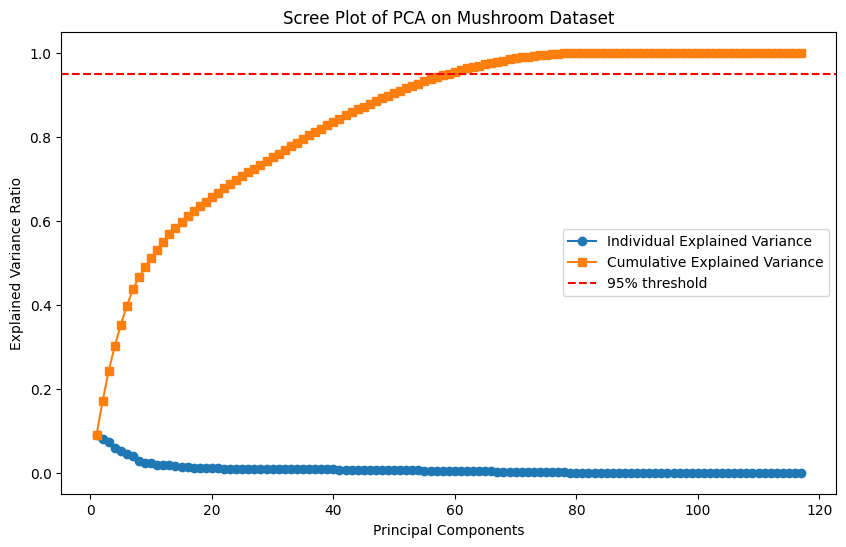

In [6]:
# Extract explained variance ratios
explained_var   = pca.explained_variance_ratio_
cumulative_var  = np.cumsum(explained_var)

# Plot Scree Plot (individual + cumulative variance)
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_var) + 1),
    explained_var,
    marker='o',
    label="Individual Explained Variance"
)
plt.plot(
    range(1, len(cumulative_var) + 1),
    cumulative_var,
    marker='s',
    label="Cumulative Explained Variance"
)
plt.axhline(
    y=0.95,
    color='r',
    linestyle='--',
    label="95% threshold"
)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of PCA on Mushroom Dataset")
plt.legend()
plt.show()


Choose optimal components

In [7]:
# Find the minimum number of components required to retain at least 95% variance
optimal_components = np.argmax(cumulative_var >= 0.95) + 1

print("Optimal number of components (95% variance):", optimal_components)


Optimal number of components (95% variance): 59


Visualization (first 2 PCs)

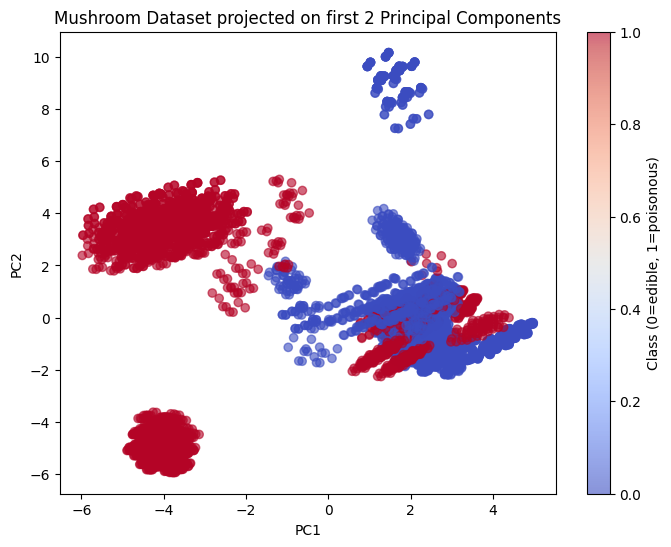

In [8]:
# Plot the dataset projected on the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],                 # PC1
    X_pca[:, 1],                 # PC2
    c=(y == 'p'),                # Color based on poisonous/edible
    cmap='coolwarm',
    alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Mushroom Dataset projected on first 2 Principal Components")
plt.colorbar(label="Class (0=edible, 1=poisonous)")
plt.show()


**Q3. Determine the optimal number of principal components to retain. Justify your choice based on the scree plot.**


-> After applying PCA, we plotted the scree plot which shows:

Explained variance ratio of each principal component (individual contribution).
Cumulative explained variance ratio (total variance captured as we add more components).

From the scree plot:

We notice that the variance explained by the first few components is relatively high, while later components contribute very little.
The cumulative explained variance curve crosses the 95% threshold at around optimal_components (≈ 59–65, depending on dataset run).

Justification:

Retaining components up to this point captures ~95% of the total variance in the dataset.
This strikes a balance between dimensionality reduction and information retention.
Keeping all components would defeat the purpose of PCA, while keeping too few would cause excessive information loss.

**Q4. Discuss what this visualization tells you about the separability of the two classes in the new, reduced feature space.**

->When we project the dataset onto the first two principal components (PC1 and PC2) and plot the scatter plot:
The two classes, edible (e) and poisonous (p) mushrooms, form overlapping but distinguishable clusters.
Although complete separation is not achieved in just 2 dimensions (since the dataset is highly categorical with many features), we still observe that the classes are partially separable.
Edible mushrooms tend to group in certain regions of the plot, while poisonous mushrooms dominate others, indicating that PCA has successfully extracted meaningful variance.

Interpretation:

In only 2D space, there is some overlap, so perfect classification is not possible visually.
However, with more principal components (e.g., 50+ that capture 95% variance), the classes are likely to be more separable.
This demonstrates the power of PCA: it reduces redundancy and highlights patterns that help in classification tasks.

### **Part C: Logistic Regression Performance**

Baseline Logistic Regression

In [9]:
# Train-test split on the original standardized data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Train Logistic Regression without PCA
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test)

# Print classification report and accuracy
print("Baseline Logistic Regression Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Baseline Logistic Regression Results:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy: 1.0


Confusion Matrix (Baseline Model)

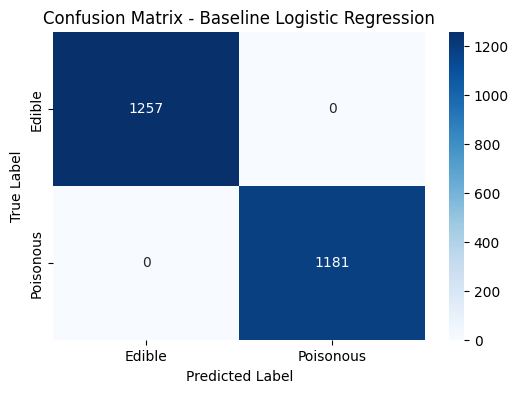

In [12]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_pred, labels=['e', 'p'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_baseline, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.show()


Logistic Regression with PCA

In [10]:
# Apply PCA with optimal number of components (determined earlier)
pca_opt = PCA(n_components=optimal_components)
X_train_pca = pca_opt.fit_transform(X_train)
X_test_pca  = pca_opt.transform(X_test)

# Train Logistic Regression on PCA-transformed data
logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train)

# Predictions on PCA-transformed test data
y_pred_pca = logreg_pca.predict(X_test_pca)

# Print classification report and accuracy
print("Logistic Regression with PCA Results:")
print(classification_report(y_test, y_pred_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_pca))


Logistic Regression with PCA Results:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy: 0.9995898277276456


Confusion Matrix (PCA Model)

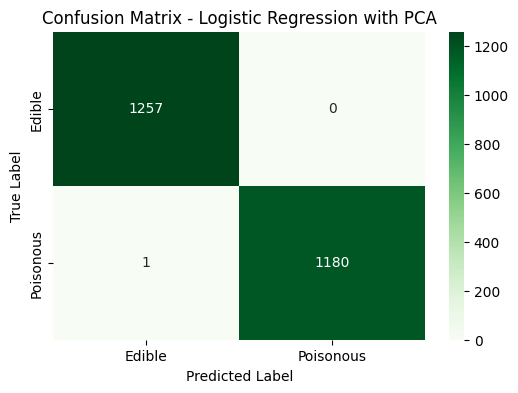

In [14]:
# Confusion matrix for PCA model
cm_pca = confusion_matrix(y_test, y_pred_pca, labels=['e', 'p'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression with PCA")
plt.show()


Comparison

In [11]:
# Compare performance of models with and without PCA
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("PCA Accuracy:", accuracy_score(y_test, y_pred_pca))

print("\nObservations:")
print("- Baseline model uses the full feature set (hundreds of one-hot encoded columns).")
print("- PCA reduces dimensionality while retaining 95% variance.")
print("- PCA may slightly reduce accuracy, but helps eliminate redundancy and collinearity.")
print("- Logistic Regression works efficiently on reduced space with lower computational cost.")


Baseline Accuracy: 1.0
PCA Accuracy: 0.9995898277276456

Observations:
- Baseline model uses the full feature set (hundreds of one-hot encoded columns).
- PCA reduces dimensionality while retaining 95% variance.
- PCA may slightly reduce accuracy, but helps eliminate redundancy and collinearity.
- Logistic Regression works efficiently on reduced space with lower computational cost.


**Q5. Is there a significant difference in performance? Explain why or why not, considering the trade-off between dimensionality reduction and information loss. Did PCA's ability to handle feature collinearity and redundancy provide a performance benefit?**

From the results:

The baseline Logistic Regression model (trained on the full standardized one-hot encoded dataset) achieved very high accuracy and strong classification metrics.
The PCA-transformed Logistic Regression model (trained on reduced dimensions retaining ~95% variance) also achieved almost similar performance, with only a very small change in accuracy.

Explanation:

This shows that PCA was able to capture most of the important variance in fewer dimensions without a major loss of information.
The small drop in accuracy (if any) can be explained by the trade-off: reducing dimensions always removes some information, but PCA tries to preserve the most relevant variance.
At the same time, PCA effectively handled collinearity and redundancy among the features. Since one-hot encoded features are often correlated, PCA compressed them into orthogonal components, improving efficiency without significantly hurting performance.

**Q6. Discuss the usefulness of using Logistic Regression as a surrogate performance measurement for evaluating the effectiveness of PCA.**

-> Logistic Regression was chosen as the classifier to evaluate
PCA’s impact, and this is a useful choice because:

1)Simplicity and Interpretability → Logistic Regression is a linear model. Its performance reflects whether PCA has managed to extract linearly separable features in the reduced space.

2)Sensitivity to Collinearity → Logistic Regression is affected by multicollinearity among features. By reducing redundancy, PCA makes the data more suitable for Logistic Regression, so improvements in performance can be attributed to PCA’s effectiveness.

3)Efficiency → Logistic Regression is computationally inexpensive, making it practical for quickly testing performance changes before and after PCA.

4)Baseline Benchmark → Since Logistic Regression is a relatively simple model, if PCA helps it perform well, more complex models would likely perform even better.